In [58]:
#importing packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [15]:
#Loading data
data= pd.read_table("WabashRiver_DailyDischarge_20150317-20160324.txt", skiprows=[0,21,25], header=[22], parse_dates=[[2,3]])

In [16]:
data #display data

,datetime_tz_cd,agency_cd,site_no,01_00060,01_00060_cd
0,2015-03-17 00:00:00-04:00,USGS,3335500,23200,P
1,2015-03-17 00:15:00-04:00,USGS,3335500,23100,P
2,2015-03-17 00:30:00-04:00,USGS,3335500,23100,P
3,2015-03-17 00:45:00-04:00,USGS,3335500,23100,P
4,2015-03-17 01:00:00-04:00,USGS,3335500,23100,P
...,...,...,...,...,...
35834,2016-03-24 12:30:00-04:00,USGS,3335500,5930,P
35835,2016-03-24 12:45:00-04:00,USGS,3335500,5900,P
35836,2016-03-24 13:00:00-04:00,USGS,3335500,5920,P
35837,2016-03-24 13:15:00-04:00,USGS,3335500,5920,P


In [21]:
#Daily average streamflow
tsavgs = pd.date_range('2015-03-17 00:00:00', periods=data.shape[0], freq='15min')

In [22]:
tsavgs #Display daily average streamflow

DatetimeIndex(['2015-03-17 00:00:00', '2015-03-17 00:15:00',
               '2015-03-17 00:30:00', '2015-03-17 00:45:00',
               '2015-03-17 01:00:00', '2015-03-17 01:15:00',
               '2015-03-17 01:30:00', '2015-03-17 01:45:00',
               '2015-03-17 02:00:00', '2015-03-17 02:15:00',
               ...
               '2016-03-24 05:15:00', '2016-03-24 05:30:00',
               '2016-03-24 05:45:00', '2016-03-24 06:00:00',
               '2016-03-24 06:15:00', '2016-03-24 06:30:00',
               '2016-03-24 06:45:00', '2016-03-24 07:00:00',
               '2016-03-24 07:15:00', '2016-03-24 07:30:00'],
              dtype='datetime64[ns]', length=35839, freq='15T')

In [37]:
AvgStfl = Series(data.loc[:,'01_00060'].values, index=tsavgs) #Creating time series data

In [43]:
AvgStflmean= AvgStfl.resample('D').mean() #Resampling for daily mean streamflow dataset

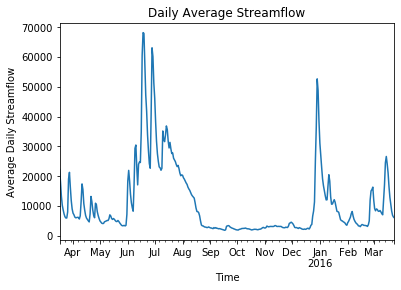

In [45]:
#Plotting data points
ax=AvgStflmean.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Average Daily Streamflow')
ax.set_title('Daily Average Streamflow')
plt.savefig('amanakta_dailyaveragestreamflow.pdf')

In [49]:
#Sorting for highest mean streamflow
descsorted= AvgStflmean.sort_values(ascending= False)
highestdays= descsorted[:9]

2015-06-18    68169.791667
2015-06-19    67908.333333
2015-06-28    63076.041667
2015-06-17    60522.916667
2015-06-29    60147.916667
2015-06-20    57897.916667
2015-12-29    52647.916667
2015-06-30    51310.416667
2015-12-30    48789.583333
dtype: float64

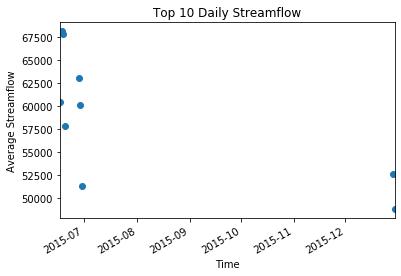

In [54]:
#Plotting top 10 daily streamflow 
ax= highestdays.plot(style= "o")
ax.set_xlabel('Time')
ax.set_ylabel('Average Streamflow')
ax.set_title('Top 10 Daily Streamflow')
plt.savefig('amanakta_highest10.pdf')

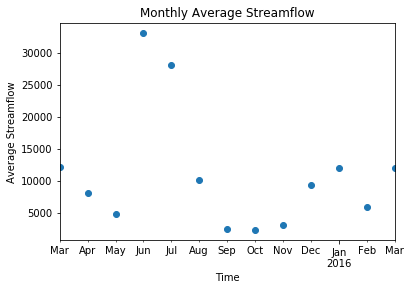

In [59]:
#Resampling for monthly mean flow and plotting 
Monthsorted= AvgStflmean.resample("M").mean()
ax= Monthsorted.plot(style="o")
ax.set_xlabel('Time')
ax.set_ylabel('Average Streamflow')
ax.set_title('Monthly Average Streamflow')
plt.savefig('amanakta_MonthlyAverageStreamflow.pdf')